## Assignmant
The purpose of this assinment is to import data set and provide the summary information of the data set.

## Understanding the data-set domain

PatientID:  unique patient identifier

Age: age in years

Sex:  1 = male; 0 = female

ChestPain: chest pain type

RestBP:  resting blood pressure (in mm Hg on admission to the hospital)

Chol: serum cholestoral in mg/dl

Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

RestECG: resting electrocardiographic results. 0: normal ; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) ;  2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

MaxHR: maximum heart rate achieved

ExAng: exercise induced angina (1 = yes; 0 = no)

Oldpeak: ST depression induced by exercise relative to rest

Slope: the slope of the peak exercise ST segment. 1: upsloping; 2: flat; 3: downsloping

Ca: number of major vessels (0-3) colored by flourosopy

Thal: Thallium stress test, 3 =normal; 6 = fixed (defect); 7 = reversable (defect)

AHD (the predicted attribute): angiographic heart disease


In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from pandas_profiling import ProfileReport


In [2]:
# Loading data to read
df = pd.read_csv("/Heart.csv", index_col = 0)

# Print the first few rows
df.head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
PatientID,,,,,,,,,,,,,,
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes


In [3]:
#trainprofile = ProfileReport(df)
#trainprofile

In [4]:
# Defining a function that will summarize the dataset.

def heart_dataset_summary(df):
    """
    A function that will perform a series operations on the dataset:
    1. Check the dimensions of the dataset.
    2. Display the first few rows of the dataset.
    3. Provide a statistical summary of all attributes.
    4. List the data types of each column.
    """

    # Display the first few rows of the dataset
    print("These are the first few rows of the dataset:")
    print('---------------------------------------------')
    print(df.head())
    print("\n\n")

    # Check the dimensions of the dataset
    print("Dimensions of the dataset is:")
    print('-----------------------------')
    print(df.shape)
    print("\n\n")

    # Display the data types of each column
    print("Data types of each column is:")
    print('------------------------------')
    print(df.dtypes)
    print("\n\n")

    # Display column names
    print("List of of the column names in the dataset")
    print('-------------------------------------------')
    print(df.columns)
    print("\n\n")

    # Provide a statistical summary of all attributes
    print("Statistical summary of all attributes:")
    print('--------------------------------------')
    print(df.describe())
    print("\n\n")

    # Display a summary information of the dataset
    print("Data summary:")
    print('-------------')
    print(df.info())
    print("\n")

heart_dataset_summary(df)

These are the first few rows of the dataset:
---------------------------------------------
            Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
PatientID                                                                      
1            63    1       typical     145   233    1        2    150      0   
2            67    1  asymptomatic     160   286    0        2    108      1   
3            67    1  asymptomatic     120   229    0        2    129      1   
4            37    1    nonanginal     130   250    0        0    187      0   
5            41    0    nontypical     130   204    0        2    172      0   

            Oldpeak  Slope   Ca        Thal  AHD  
PatientID                                         
1               2.3      3  0.0       fixed   No  
2               1.5      2  3.0      normal  Yes  
3               2.6      2  2.0  reversable  Yes  
4               3.5      3  0.0      normal   No  
5               1.4      1  0.0      norma

In [5]:
# Defining a function that will check for duplicated rows,
# display them in a DataFrame and drop the duplicated values.

def handle_duplicates(df):
    """
    Checks for duplicated rows, displays the duplicated values,
    and removes the duplicated rows while keeping the first occurrence.
    """
    # Check for duplicated rows
    duplicated_rows = df[df.duplicated()]

    if not duplicated_rows.empty:
        # Display the duplicated rows
        print("These are the Duplicated rows in the Dataset:")
        print('--------------------------------------------------')
        print(duplicated_rows)
        print("\n")

        # Remove duplicated rows but keep the first occurrence (inplace)
        df.drop_duplicates(keep='first', inplace=True)

        # Display the number of duplicates removed
        num_duplicates = len(duplicated_rows)
        print(f"Number of duplicates removed: {num_duplicates}")
    else:
        print("No duplicated rows found.")
handle_duplicates(df)

No duplicated rows found.


In [6]:
# Checking if duplicated values have been removed
df.duplicated().value_counts()

,count
False,303


In [7]:
# Defining a function that will calcutale ad display missing values in a DataFrame
def missing_values(df):

  # Calculate the missing values
  missing_val = df.isnull().sum()

  # Calclate the percetage of the missing values
  missing_per = (df.isnull().sum() / len(df)) * 100

  # Put the missing values in the DataFrame
  missing_data = pd.DataFrame({"Missing_Values": missing_val, "Missing_Percentage": missing_per})

  # Get the missing columns
  missing_data = missing_data[missing_data['Missing_Values'] > 0]

  # Display missing data
  print(missing_data)

# Print the results
missing_values(df)

      Missing_Values  Missing_Percentage
Ca                 4            1.320132
Thal               2            0.660066


In [8]:
# Drop missing values
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


## Understanding Data Domain

Based in the information given from the data domain, `Sex`, `Fbs`, `Slope` and `ExAng` are detected as numeric in the data but from the domain knowledge they should be categoric. In the following cell, these columns will be converted to object data type.


In [10]:
# Define a finction that will iterate trough the columns and convert them to
# object datatype.
def convert_int_to_object(df, columns):
    """
    Convert specific columns (Sex, Fbs, Slope and ExAng) from numeric to categoric
    data type.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to be converted.
    Returns:
    pd.DataFrame: DataFrame with the specific columns to be converted to object type.
    """

    # Check the existance of the columns in the DataFrame and convert them
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(object)
        else:
            print(f"Column '{column}' not found in the DataFrame.")

    return df


In [11]:
# Convert 'Sex', 'Fbs', 'Slope' and 'ExAng' from int to object
df = convert_int_to_object(df, ['Sex', 'Fbs', 'Slope', 'ExAng'])

print(df.dtypes)

Age            int64
Sex           object
ChestPain     object
RestBP         int64
Chol           int64
Fbs           object
RestECG        int64
MaxHR          int64
ExAng         object
Oldpeak      float64
Slope         object
Ca           float64
Thal          object
AHD           object
dtype: object


In [12]:
# Defining a funnction that will display statistical measures
def statistical_meaasures(df):

    # Selecting numeric columns only
    cont_data = df.select_dtypes(include='number')

    # Statistical measures calculations
    mean = cont_data.mean()
    median = cont_data.median()
    std_dev =cont_data.std()
    variance = cont_data.var()
    max =cont_data.max()
    min =cont_data.min()
    sum = cont_data.sum()

    # Fomular for calculating Median Absolute Deviation (MAD) with numpy
    mad = cont_data.apply(lambda x: np.median(np.abs(x - np.median(x))))

    # Print the outcomes
    print("Mean:\n", mean)
    print("\nMedian:\n", median)
    print("\nStandard Deviation:\n", std_dev)
    print("\nVariance:\n", variance)
    print("\nMedian Absolute Deviation (MAD):\n", mad)
    print("\nMaximum:\n", max)
    print("\nMinimum:\n", min)
    print("\nSum:\n", sum)

# Calling the function to display statistical measures
statistical_meaasures(df)


Mean:
 Age         54.542088
RestBP     131.693603
Chol       247.350168
RestECG      0.996633
MaxHR      149.599327
Oldpeak      1.055556
Ca           0.676768
dtype: float64

Median:
 Age         56.0
RestBP     130.0
Chol       243.0
RestECG      1.0
MaxHR      153.0
Oldpeak      0.8
Ca           0.0
dtype: float64

Standard Deviation:
 Age         9.049736
RestBP     17.762806
Chol       51.997583
RestECG     0.994914
MaxHR      22.941562
Oldpeak     1.166123
Ca          0.938965
dtype: float64

Variance:
 Age          81.897716
RestBP      315.517290
Chol       2703.748589
RestECG       0.989853
MaxHR       526.315270
Oldpeak       1.359842
Ca            0.881654
dtype: float64

Median Absolute Deviation (MAD):
 Age         6.0
RestBP     10.0
Chol       32.0
RestECG     1.0
MaxHR      15.0
Oldpeak     0.8
Ca          0.0
dtype: float64

Maximum:
 Age         77.0
RestBP     200.0
Chol       564.0
RestECG      2.0
MaxHR      202.0
Oldpeak      6.2
Ca           3.0
dtype: float64



In [13]:
def display_continuous_frequencies(df):
    """
    Display the frequency of unique values for each numeric column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    # Select only the continuous (numeric) columns
    numeric_data = df.select_dtypes(include='number')

    # Display the frequency of unique values for each numeric column
    for column in numeric_data.columns:
        print(f"Frequencies for {column}:")
        print(numeric_data[column].value_counts())
        print("\n")

# Call the function to display frequencies of continuous variables
display_continuous_frequencies(df)

Frequencies for Age:
Age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
62    11
44    11
52    11
64    10
41    10
67     9
63     9
42     8
45     8
55     8
61     8
65     8
50     7
66     7
43     7
48     7
53     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
29     1
77     1
38     1
74     1
76     1
Name: count, dtype: int64


Frequencies for RestBP:
RestBP
120    37
130    36
140    32
110    19
150    17
160    11
138    10
128    10
125    10
112     9
132     7
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
158     1
104     1
174     1
117     1
164     1
Name: count, dtype: int64


Frequencies for Cho

In [14]:
# Definig a function to dispaly the frequency for numerical variables and but them in the bins
# for easy understanding

def frequency_continuous_columns(df, bins=10):

    # Select numeric columns only
    num_data = df.select_dtypes(include='number')

    # Iterate through each numeric column and display the frequency of values in bins
    for column in num_data.columns:
        print(f"\nFrequency distribution for: {column}")

        # Create bins data for numeric values and display frequency in each bin
        data_bins = pd.cut(num_data[column], bins=bins)
        print(data_bins.value_counts())

# Calling the function and displaying the frequency of numeric variables
frequency_continuous_columns(df, bins=10)



Frequency distribution for: Age
Age
(57.8, 62.6]      63
(53.0, 57.8]      52
(62.6, 67.4]      43
(48.2, 53.0]      42
(43.4, 48.2]      38
(38.6, 43.4]      32
(67.4, 72.2]      14
(33.8, 38.6]       9
(72.2, 77.0]       3
(28.952, 33.8]     1
Name: count, dtype: int64

Frequency distribution for: RestBP
RestBP
(125.8, 136.4]     71
(115.2, 125.8]     66
(136.4, 147.0]     54
(104.6, 115.2]     42
(147.0, 157.6]     27
(157.6, 168.2]     14
(93.894, 104.6]    10
(168.2, 178.8]      8
(178.8, 189.4]      3
(189.4, 200.0]      2
Name: count, dtype: int64

Frequency distribution for: Chol
Chol
(213.6, 257.4]      102
(169.8, 213.6]       70
(257.4, 301.2]       69
(301.2, 345.0]       36
(125.562, 169.8]     12
(388.8, 432.6]        4
(345.0, 388.8]        3
(520.2, 564.0]        1
(432.6, 476.4]        0
(476.4, 520.2]        0
Name: count, dtype: int64

Frequency distribution for: RestECG
RestECG
(-0.002, 0.2]    147
(1.8, 2.0]       146
(0.8, 1.0]         4
(0.2, 0.4]         0
(0.4

In [15]:
# Function to display all categorical columns
def print_categorical_columns(df):
    # Find categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(df)

Sex
ChestPain
Fbs
ExAng
Slope
Thal
AHD


In [16]:
# Function to display all numeric columns
def print_continuous_columns(df):
    # Find continuous columns
    continuous_columns = df.select_dtypes(include='number').columns

    # Print the column names
    for column in continuous_columns:
        print(column)

print_continuous_columns(df)

Age
RestBP
Chol
RestECG
MaxHR
Oldpeak
Ca


## Data Visualization

Histograms and bar-plots to show statistical summary visualization for data understanding

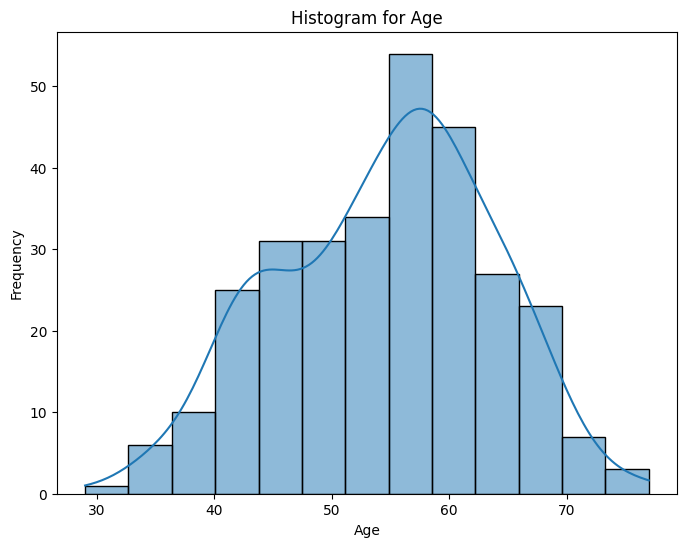

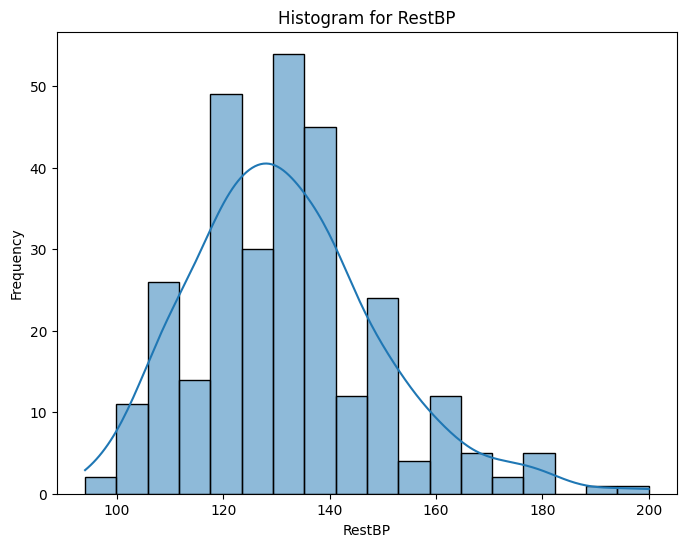

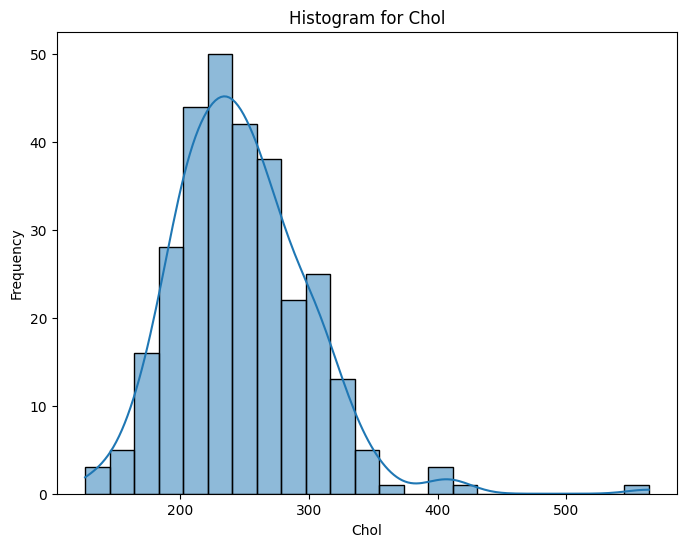

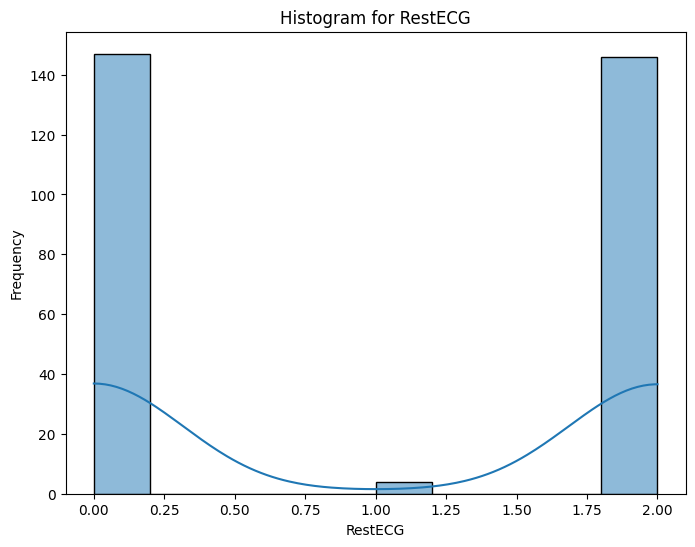

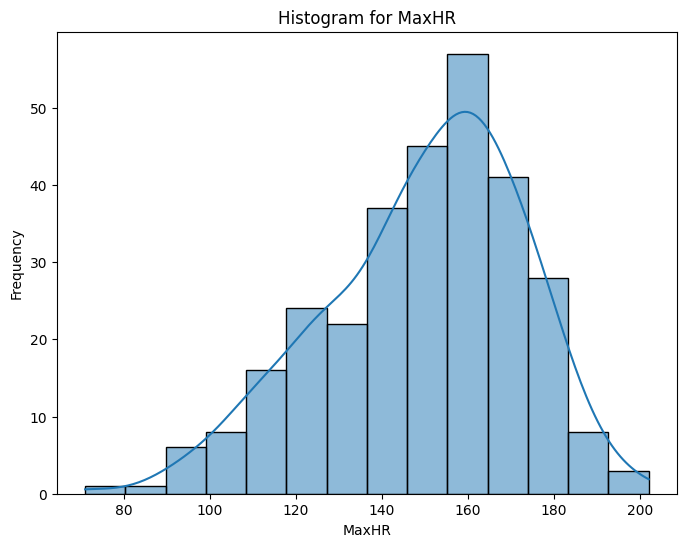

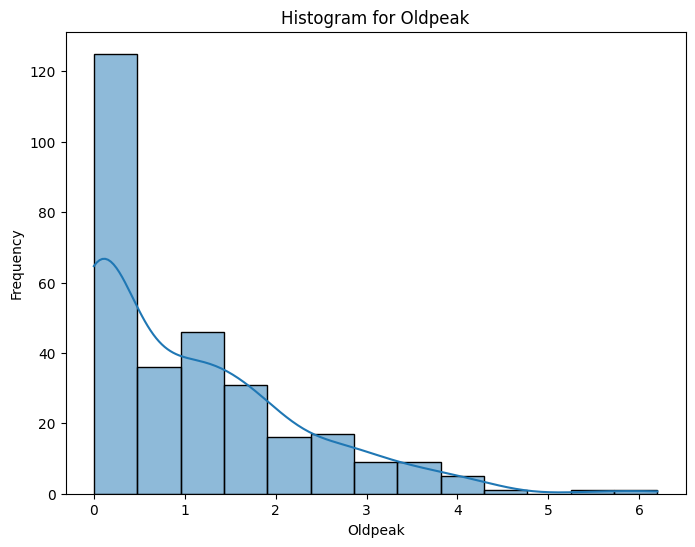

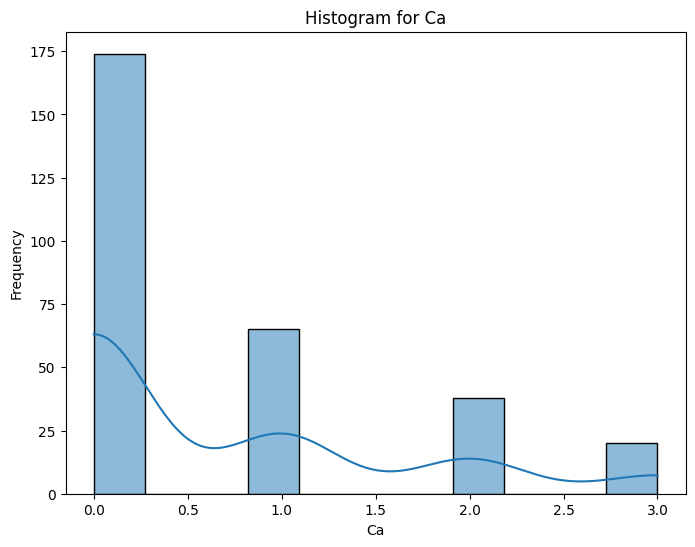

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


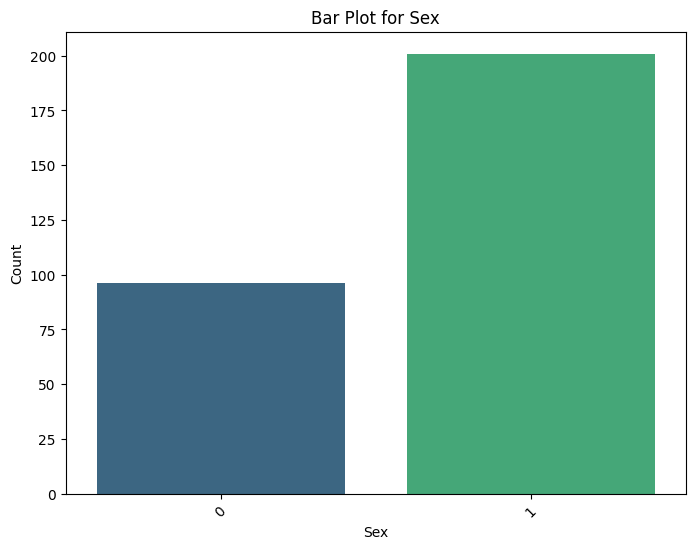

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


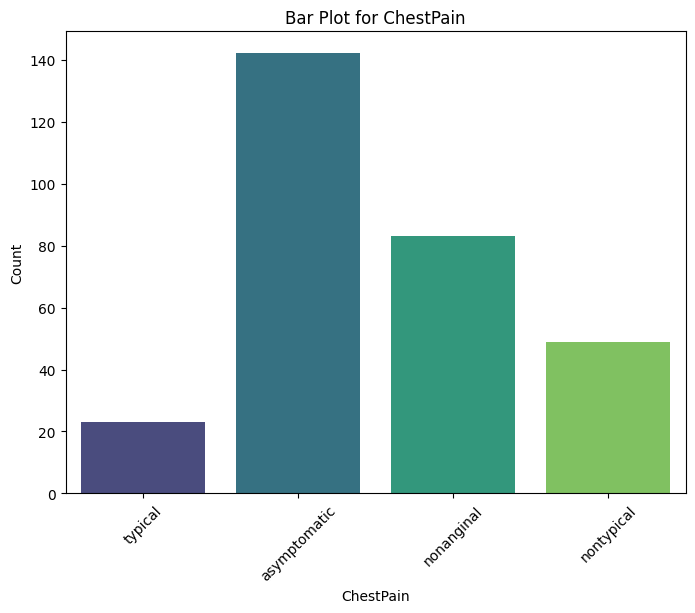

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


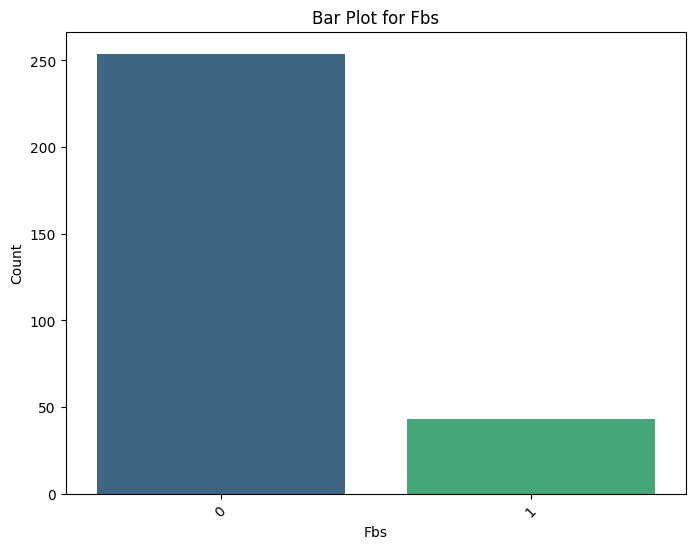

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


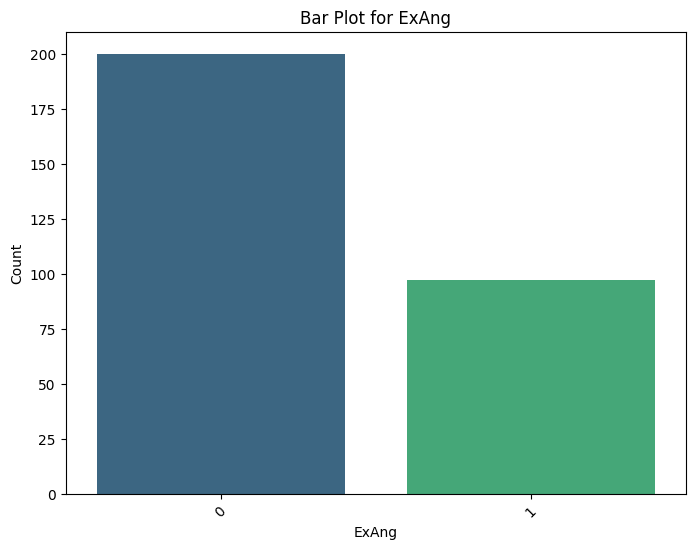

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


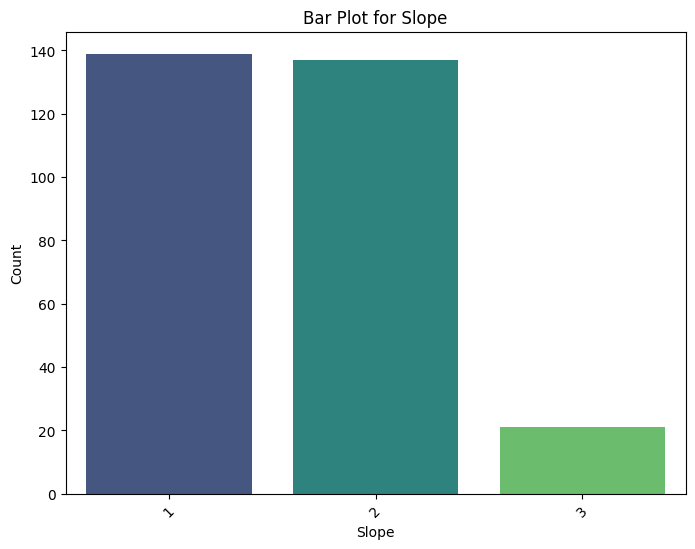

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


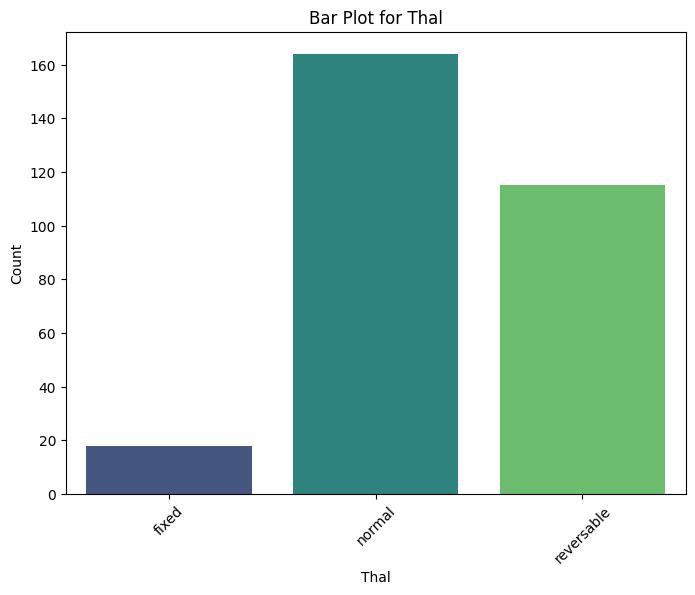

<ipython-input-17-49932f21b9e4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cate_data[column], palette="viridis")


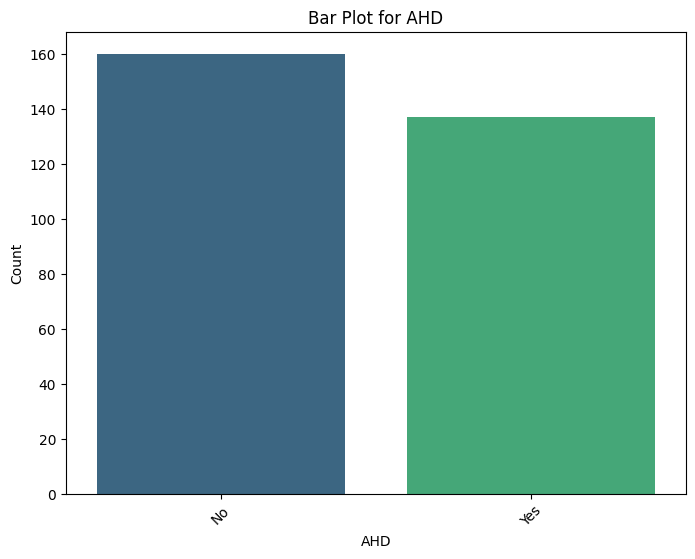

In [17]:
# Definig a function to plot histograms
def plot_histograms(df):
    """
    Plot histograms for continuous variables and bar plots for categorical variables.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """

    # Separating continuous and categorical variables
    conti_data = df.select_dtypes(include='number')
    cate_data = df.select_dtypes(include='object')

    # Creating a for loop to plot histograms for continuous variables
    for column in conti_data.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(conti_data[column], kde=True)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Creating a for loo to plot bar plots for categorical variables
    for column in cate_data.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=cate_data[column], palette="viridis")
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Callig the function to plot histograms for continuous and categorical variables
plot_histograms(df)
